In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from utils.ml_data_provider import DataProvider

In [85]:
data_provider = DataProvider(cache_path='/Users/j4yzer/PycharmProjects/VKR/data/ml')
data : pd.DataFrame = data_provider.load_data()
data = data.set_index('date')
data = data.replace([-np.Inf, np.Inf], np.nan)
data = data.dropna()

y = data['nextPeriodRelativeToSPReturn']
X = data.drop(['nextPeriodRelativeToSPReturn', 'ticker'], axis=1)
data_train, data_test = train_test_split(data.drop(['ticker'], axis=1), test_size=0.2, shuffle=False)
X_test = data_test.drop(['nextPeriodRelativeToSPReturn'], axis=1)
y_test = data_test['nextPeriodRelativeToSPReturn']

In [62]:
data_train.info()
data_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1504 entries, 2003-03-31 to 2018-09-28
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   absoluteReturn                1504 non-null   float64
 1   relativeToSPReturn            1504 non-null   float64
 2   closePrice                    1504 non-null   float64
 3   dilutedEarningsPerShare       1504 non-null   float64
 4   freeCashFlowPerShare          1504 non-null   float64
 5   bookValuePerShare             1504 non-null   float64
 6   equityRatio                   1504 non-null   float64
 7   marketCap                     1504 non-null   int64  
 8   priceToEarningsRatio          1504 non-null   float64
 9   priceToSalesRatio             1504 non-null   float64
 10  priceToFreeCashFlow           1504 non-null   float64
 11  priceToBookRatio              1504 non-null   float64
 12  enterpriseValueToSalesRatio   1504 non-null   float6

,absoluteReturn,relativeToSPReturn,closePrice,dilutedEarningsPerShare,freeCashFlowPerShare,bookValuePerShare,equityRatio,marketCap,priceToEarningsRatio,priceToSalesRatio,priceToFreeCashFlow,priceToBookRatio,enterpriseValueToSalesRatio,currentRatio,roic,netCurrentAssetValuePerShare,ebitdaMargin,netIncomeMargin,returnOnAssets,returnOnEquity
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1.504000e+03,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,0.034186,0.012631,62.551628,0.885443,0.968543,15.478488,0.439274,1.300927e+11,36.611611,2.811439,81.029373,5.520800,2.803804,1.623235,0.150704,-12.064129,0.242957,0.131636,0.096537,0.048758
std,0.120575,0.103560,43.918496,0.860416,1.116773,12.801445,0.175724,1.098608e+11,411.301438,2.309627,2008.233623,22.122353,2.204733,0.881574,0.091968,14.985803,0.158459,0.114203,0.052370,6.734637
min,-0.514734,-0.369990,0.480000,-5.873278,-9.288500,-8.712900,-0.199400,1.440473e+09,-4024.962700,0.303100,-479.049900,-175.029500,0.321500,0.000000,-0.099200,-63.044681,-0.269700,-0.738400,-0.055700,-257.973600
25%,-0.037408,-0.052597,30.900000,0.373322,0.336075,7.149450,0.359650,5.744529e+10,14.047800,1.113700,12.372450,2.702275,1.278700,1.041225,0.097000,-17.660411,0.132275,0.060375,0.062275,0.149100
50%,0.027893,0.006471,52.640000,0.706882,0.751750,12.662450,0.464650,1.063615e+11,17.862600,2.303500,16.646350,3.838900,2.313250,1.343600,0.136300,-7.229567,0.235600,0.116250,0.090900,0.208500
75%,0.104330,0.071535,81.735000,1.230741,1.296725,20.633100,0.553900,1.758687e+11,22.392575,3.624050,21.575725,5.697550,3.560425,1.958225,0.199375,-0.230009,0.330675,0.196950,0.133325,0.282275
max,0.666667,0.581062,371.900000,5.725560,7.995900,83.667000,0.809300,1.073483e+12,10439.343000,15.896900,76211.748900,691.228200,15.127600,6.333800,0.960700,5.022918,3.292900,0.697900,0.366200,10.453400


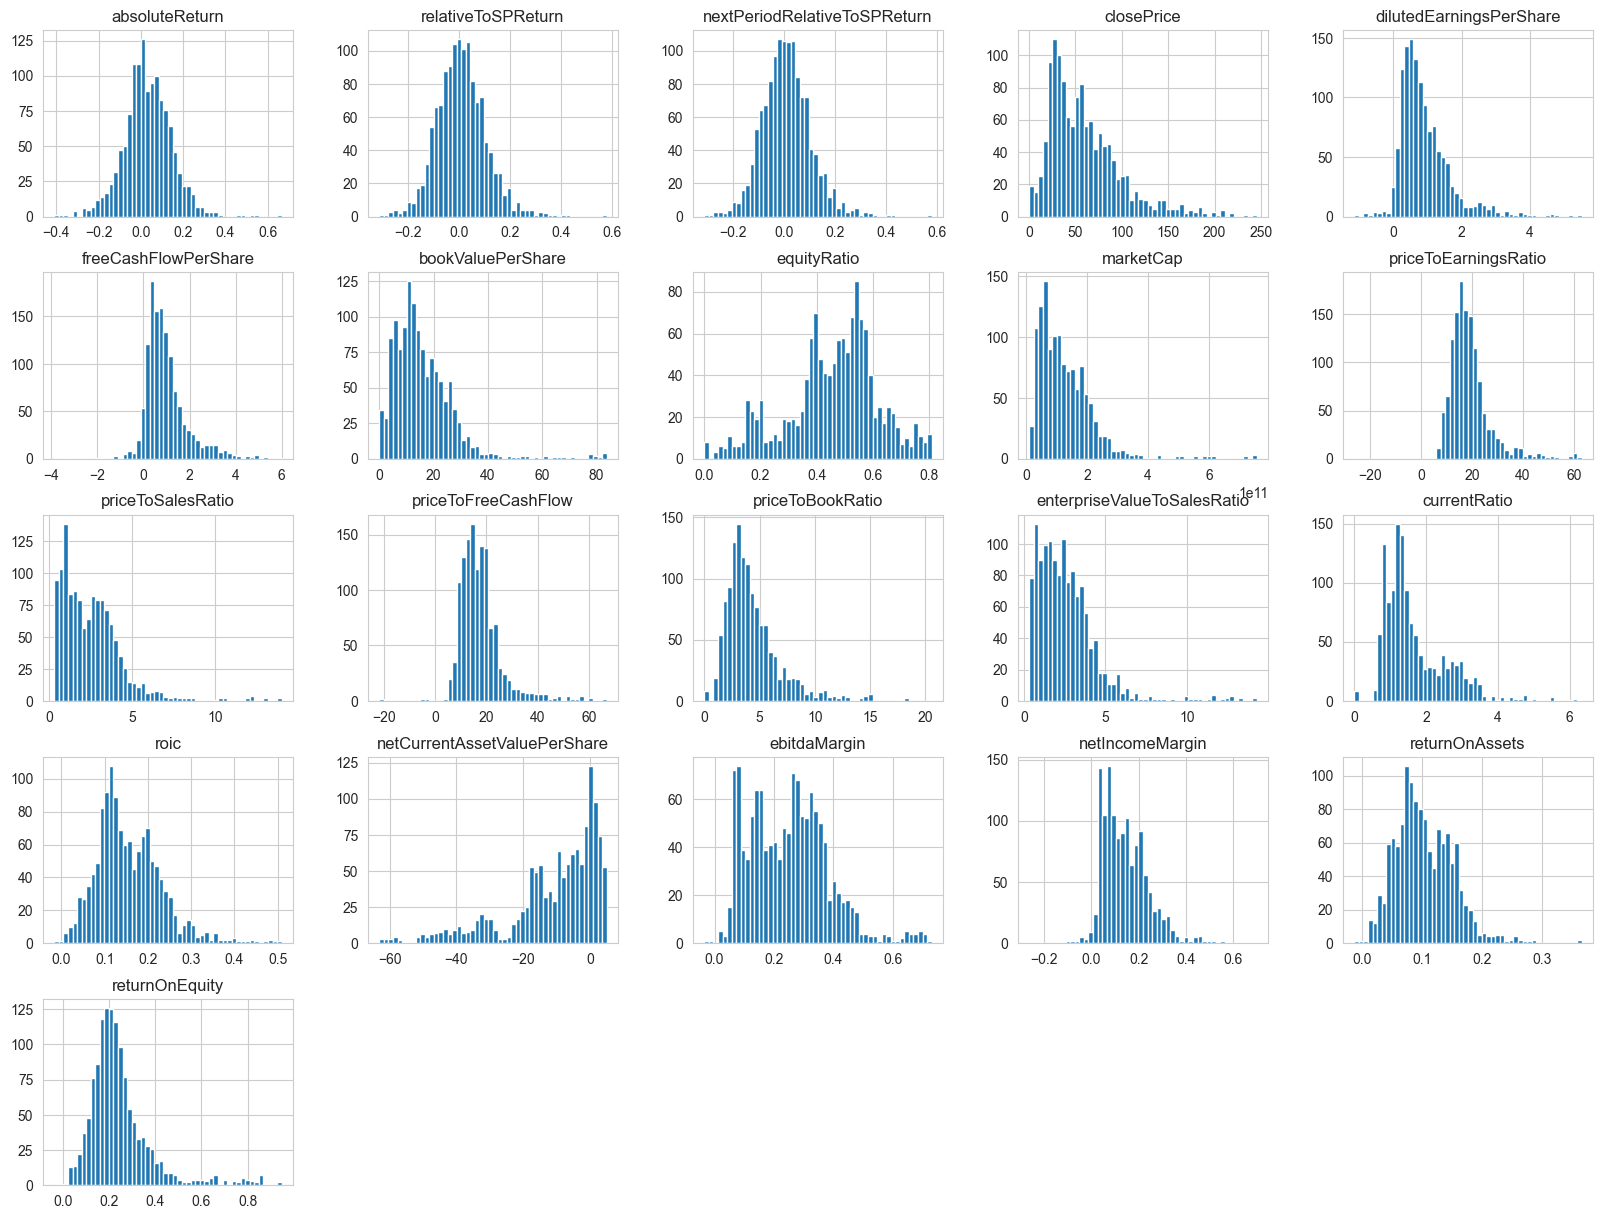

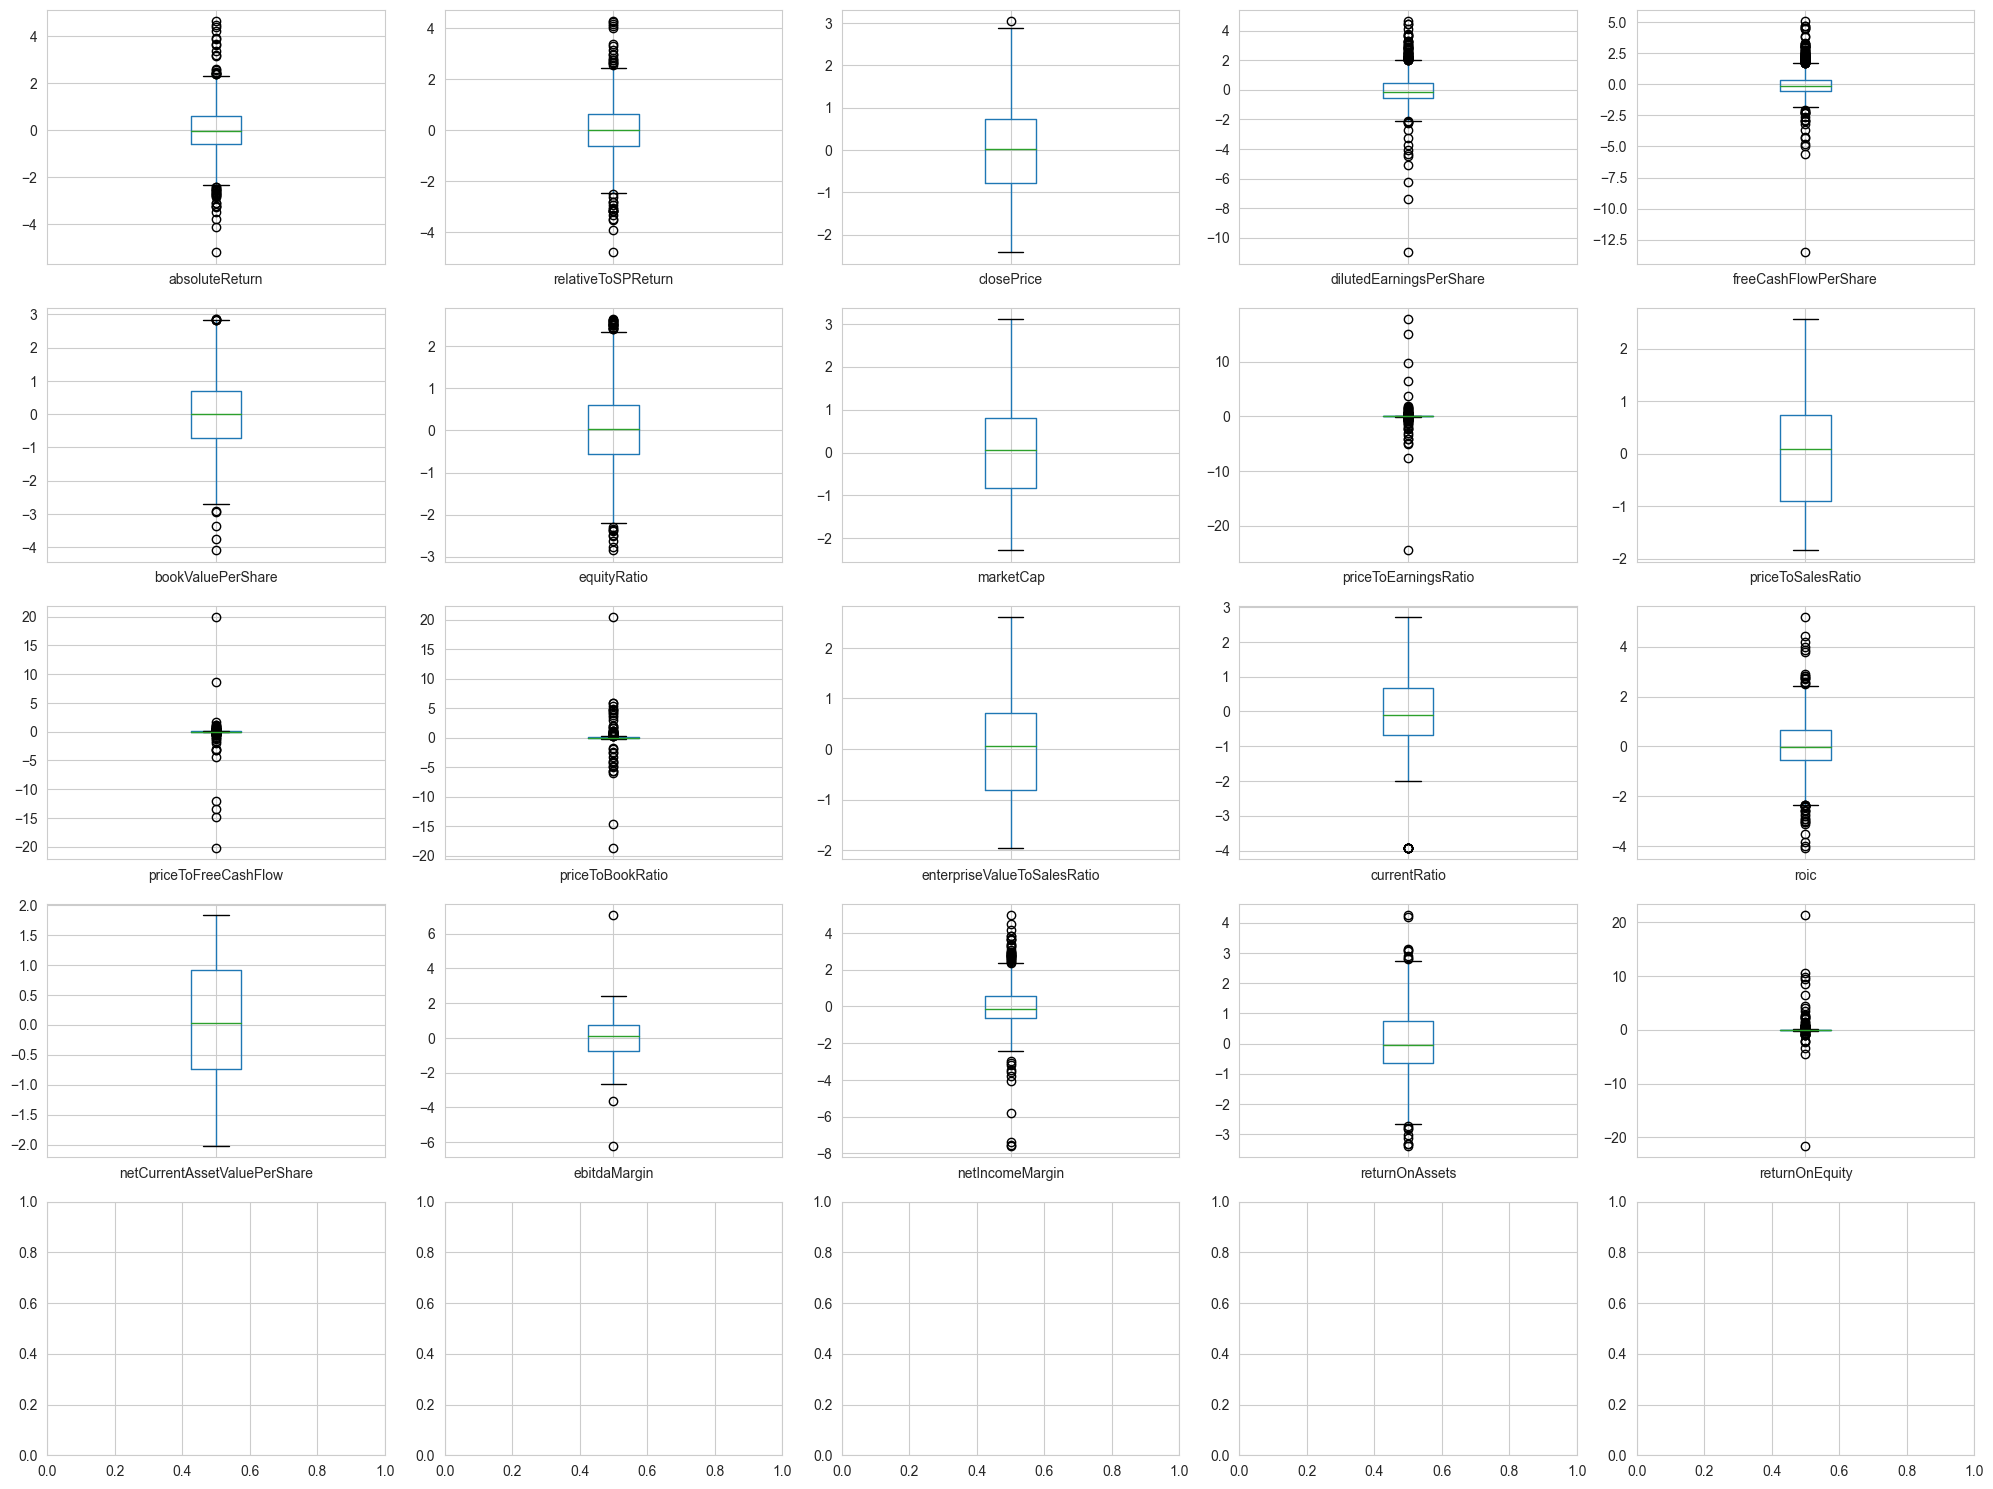

In [90]:
def drop_outliers_iqr(df, iqr_bound=(0.25, 0.75), IQR_k=5):
    Q1 = df.quantile(iqr_bound[0])
    Q3 = df.quantile(iqr_bound[1])
    IQR = Q3 - Q1
    return df[~((df < (Q1 - IQR_k * IQR)) |(df > (Q3 + IQR_k * IQR))).any(axis=1)]
def visualise_data(df: pd.DataFrame, remove_outliers=True, IQR_k=5):
    df_to_visualize = df.copy()
    if remove_outliers:
        df_to_visualize = drop_outliers_iqr(df_to_visualize)
    df_to_visualize.hist(bins=50, figsize=(20, 15))
    fig, axes = plt.subplots(5, int(np.ceil(len(df_to_visualize.columns) / 5)), figsize=(20, 15))
    for i,el in enumerate(list(scaled_x.columns.values)):
        a = scaled_x.boxplot([el], ax=axes.flatten()[i])
    plt.tight_layout()
    plt.show()
visualise_data(data_train)


In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

def drop_outliers_zscore(df, zscore_threshold = 1.5):
    return df[(np.abs(stats.zscore(df)) < zscore_threshold).all(axis=1)]

def drop_outlier_quantile(df, quantile=0.97):
    pass

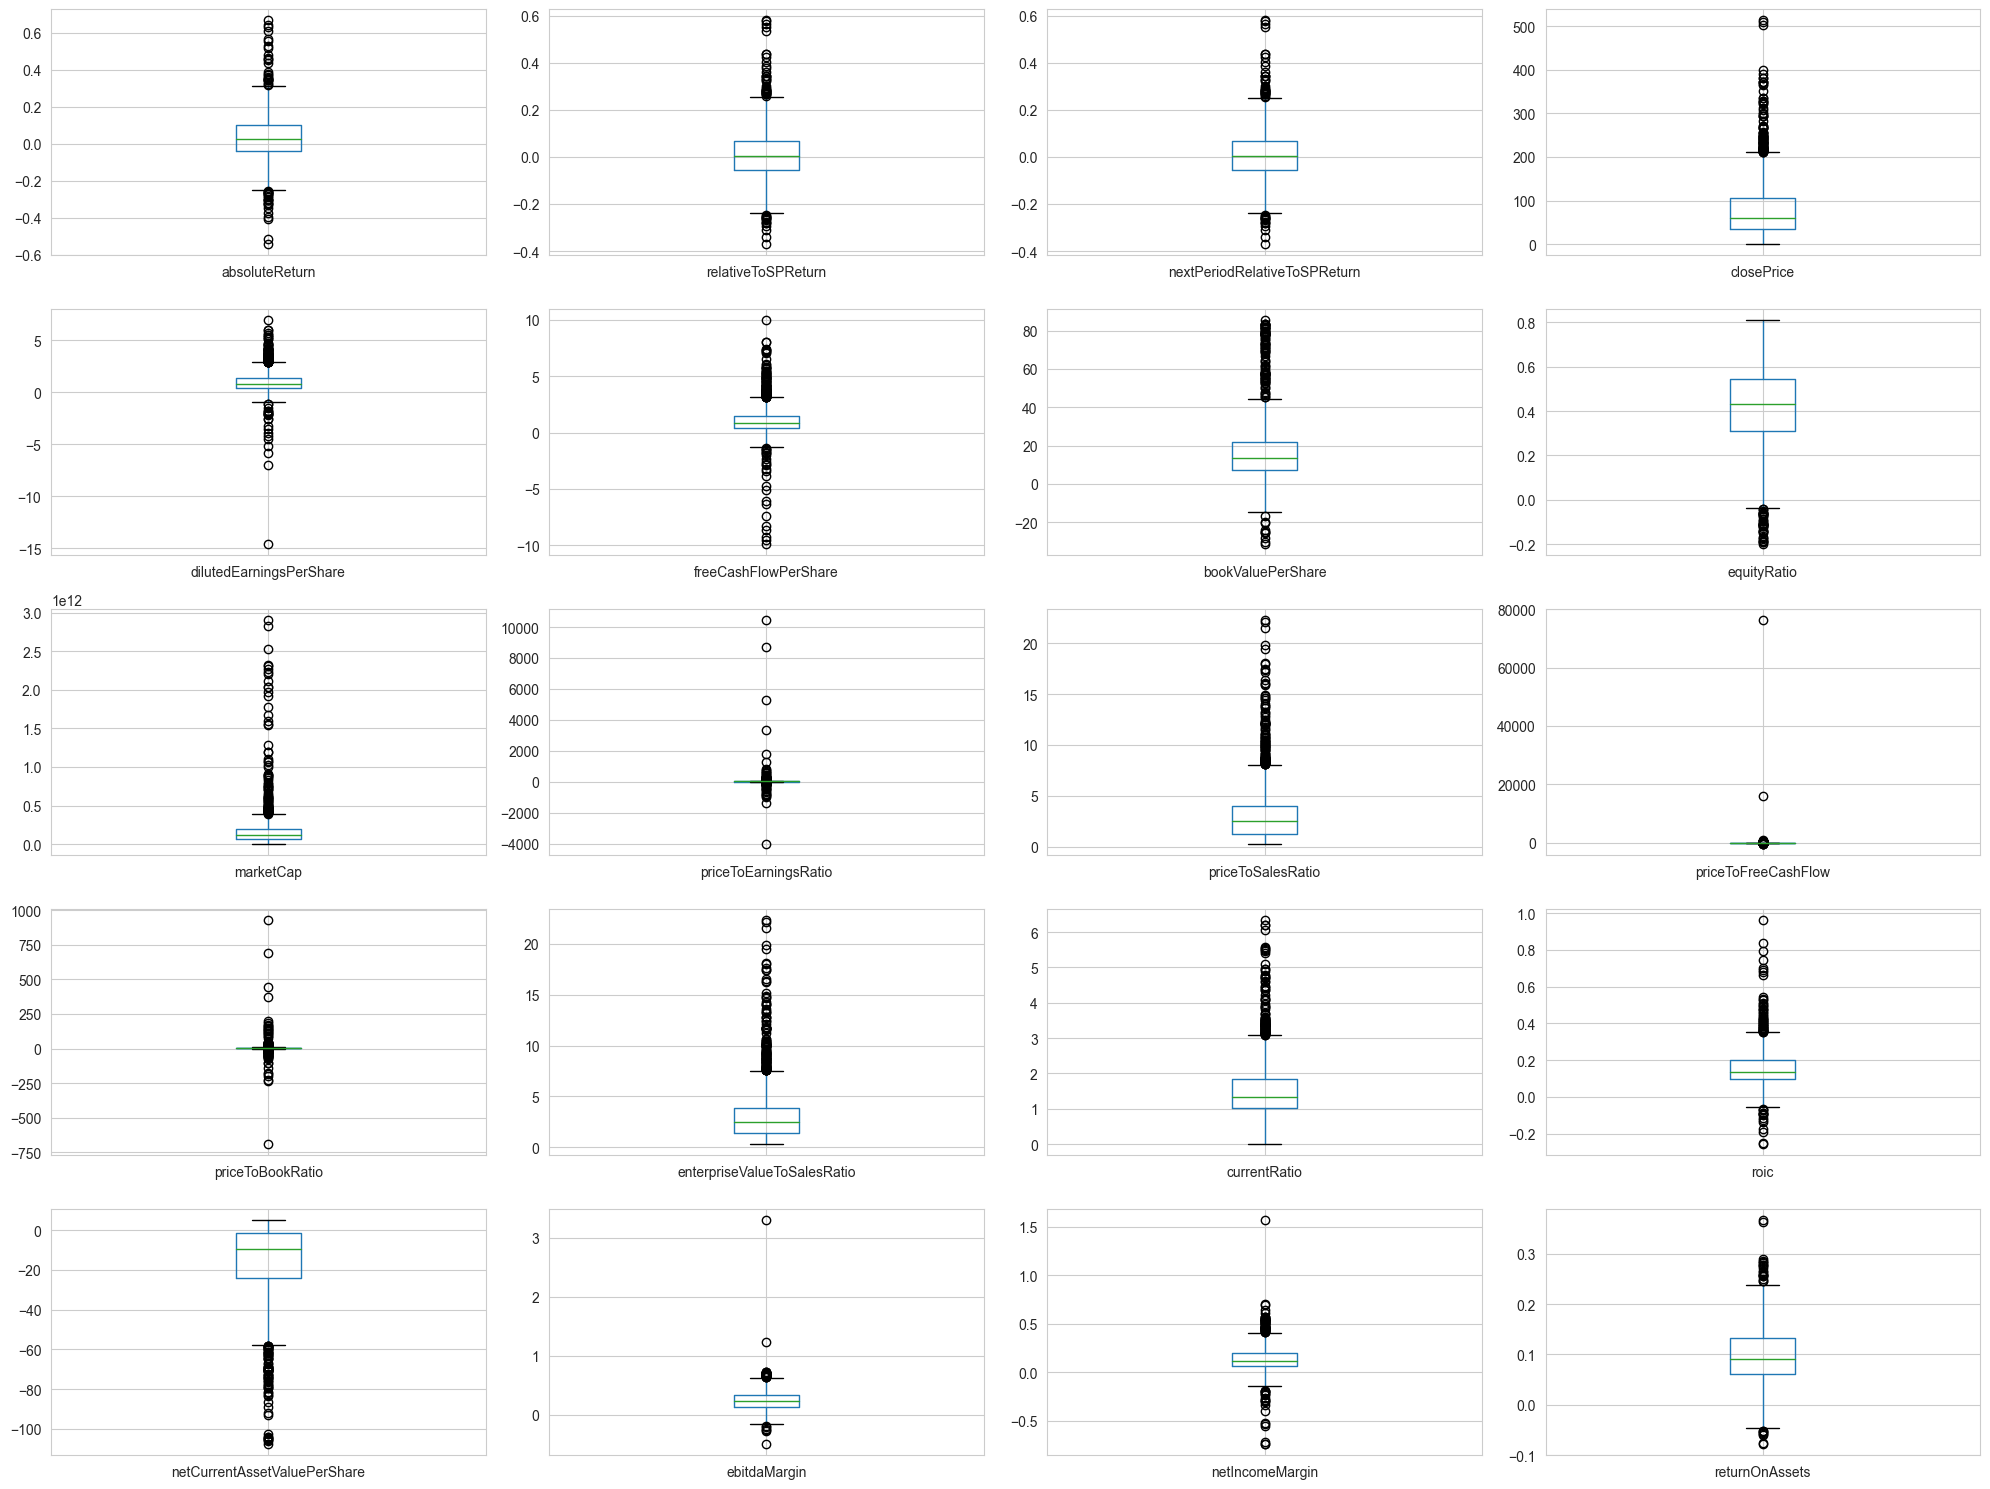

In [51]:
fig, axes = plt.subplots(5,4, figsize=(20,15))
for i,el in enumerate(list(data.drop(['ticker'], axis=1).columns.values)[:-1]):
    a = data.boxplot([el], ax=axes.flatten()[i])
# fig.delaxes(axes[1,1]) # remove empty subplot
plt.tight_layout()

plt.show()

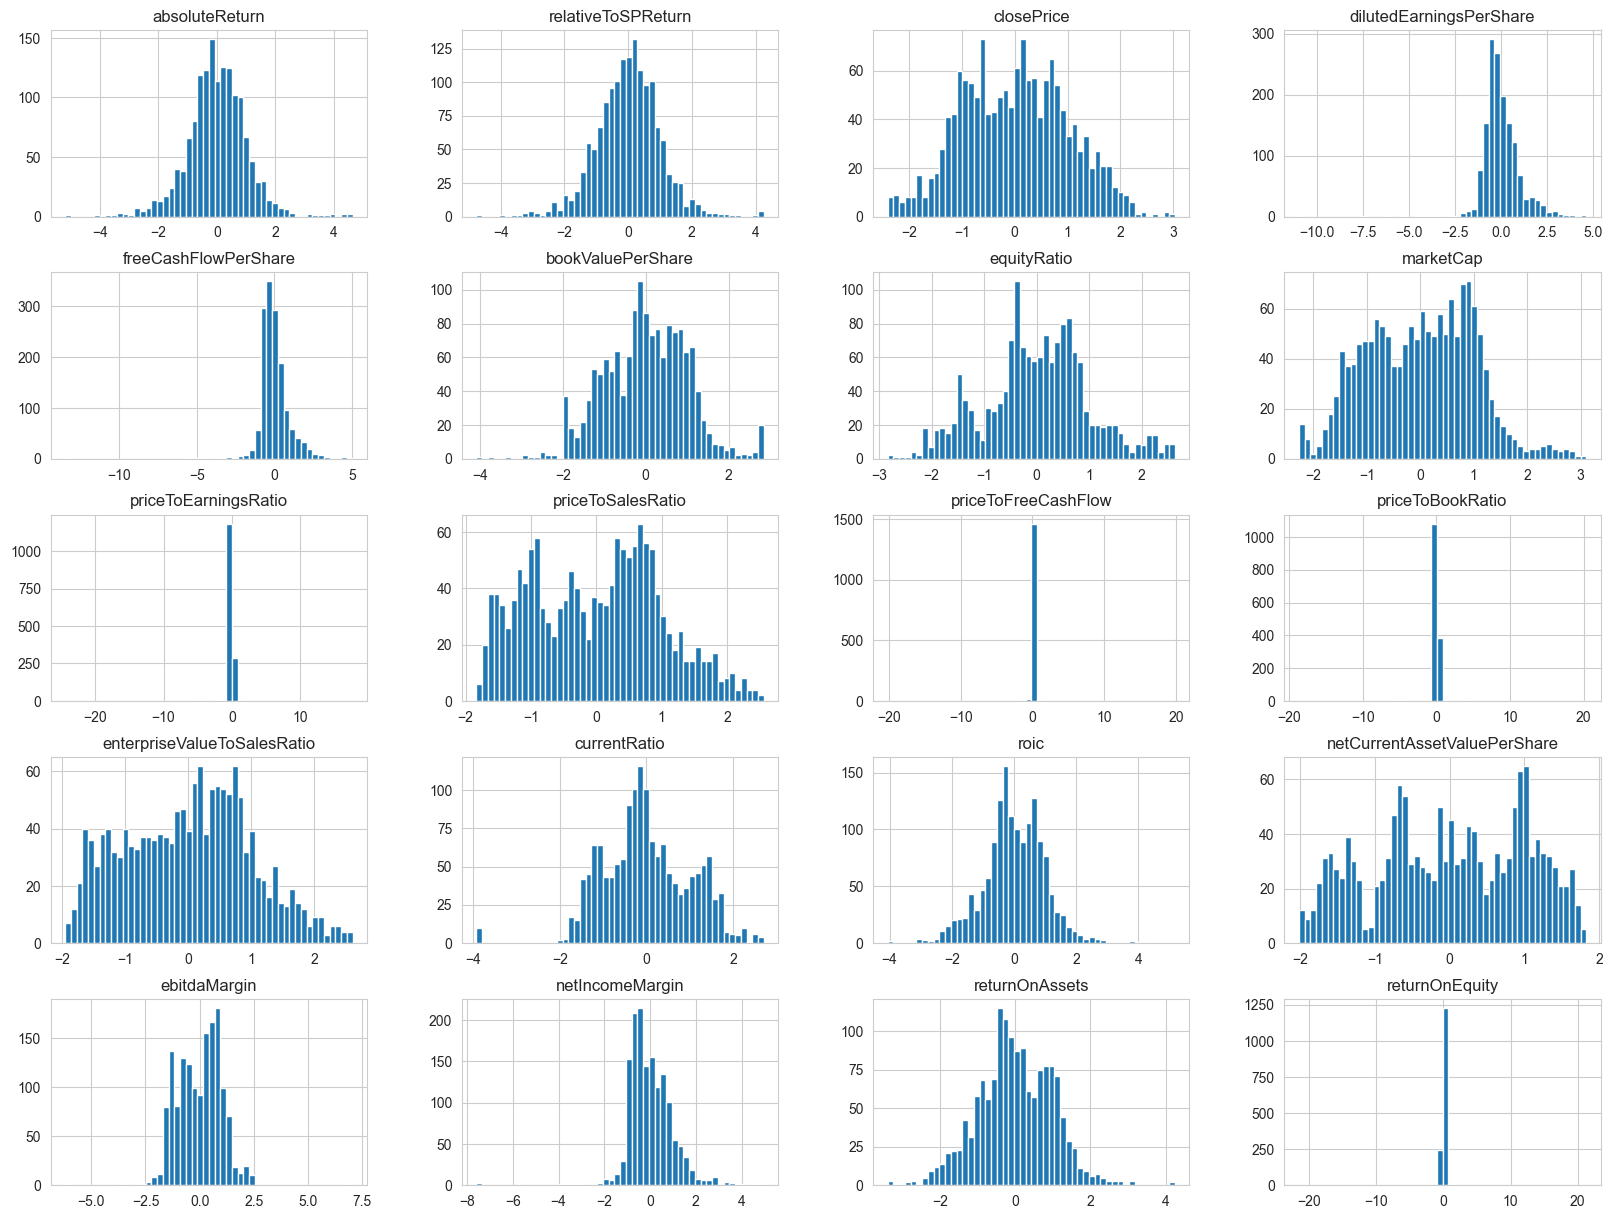

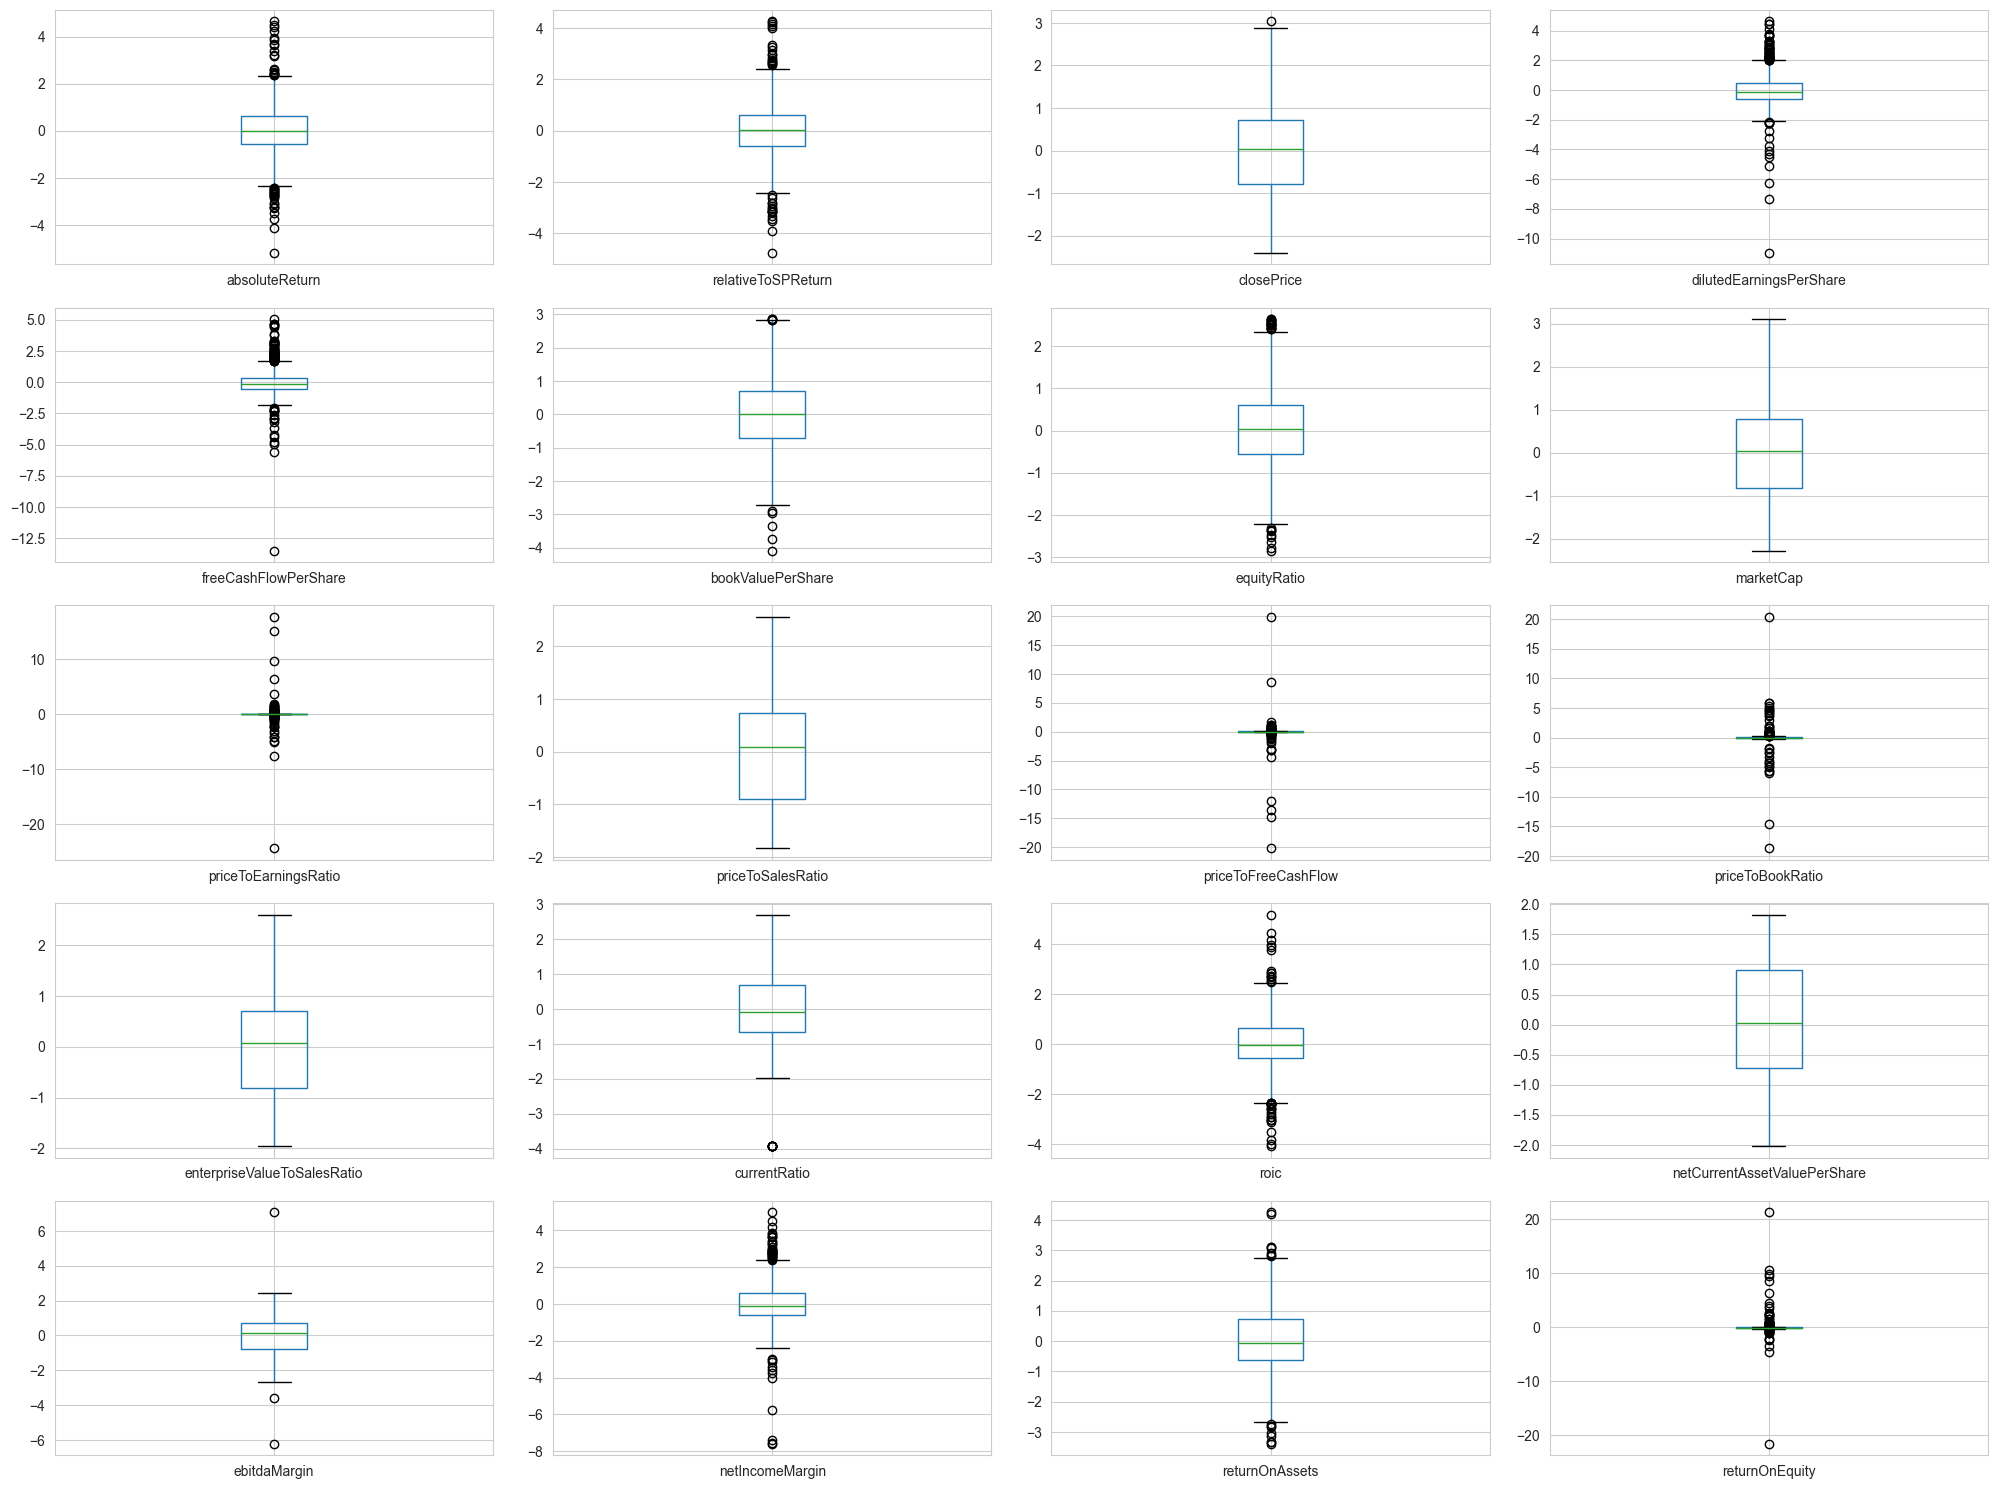

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.preprocessing import RobustScaler

X_train = data_train.drop(['ticker', 'nextPeriodRelativeToSPReturn'], axis=1)
y_train = data_train['nextPeriodRelativeToSPReturn']

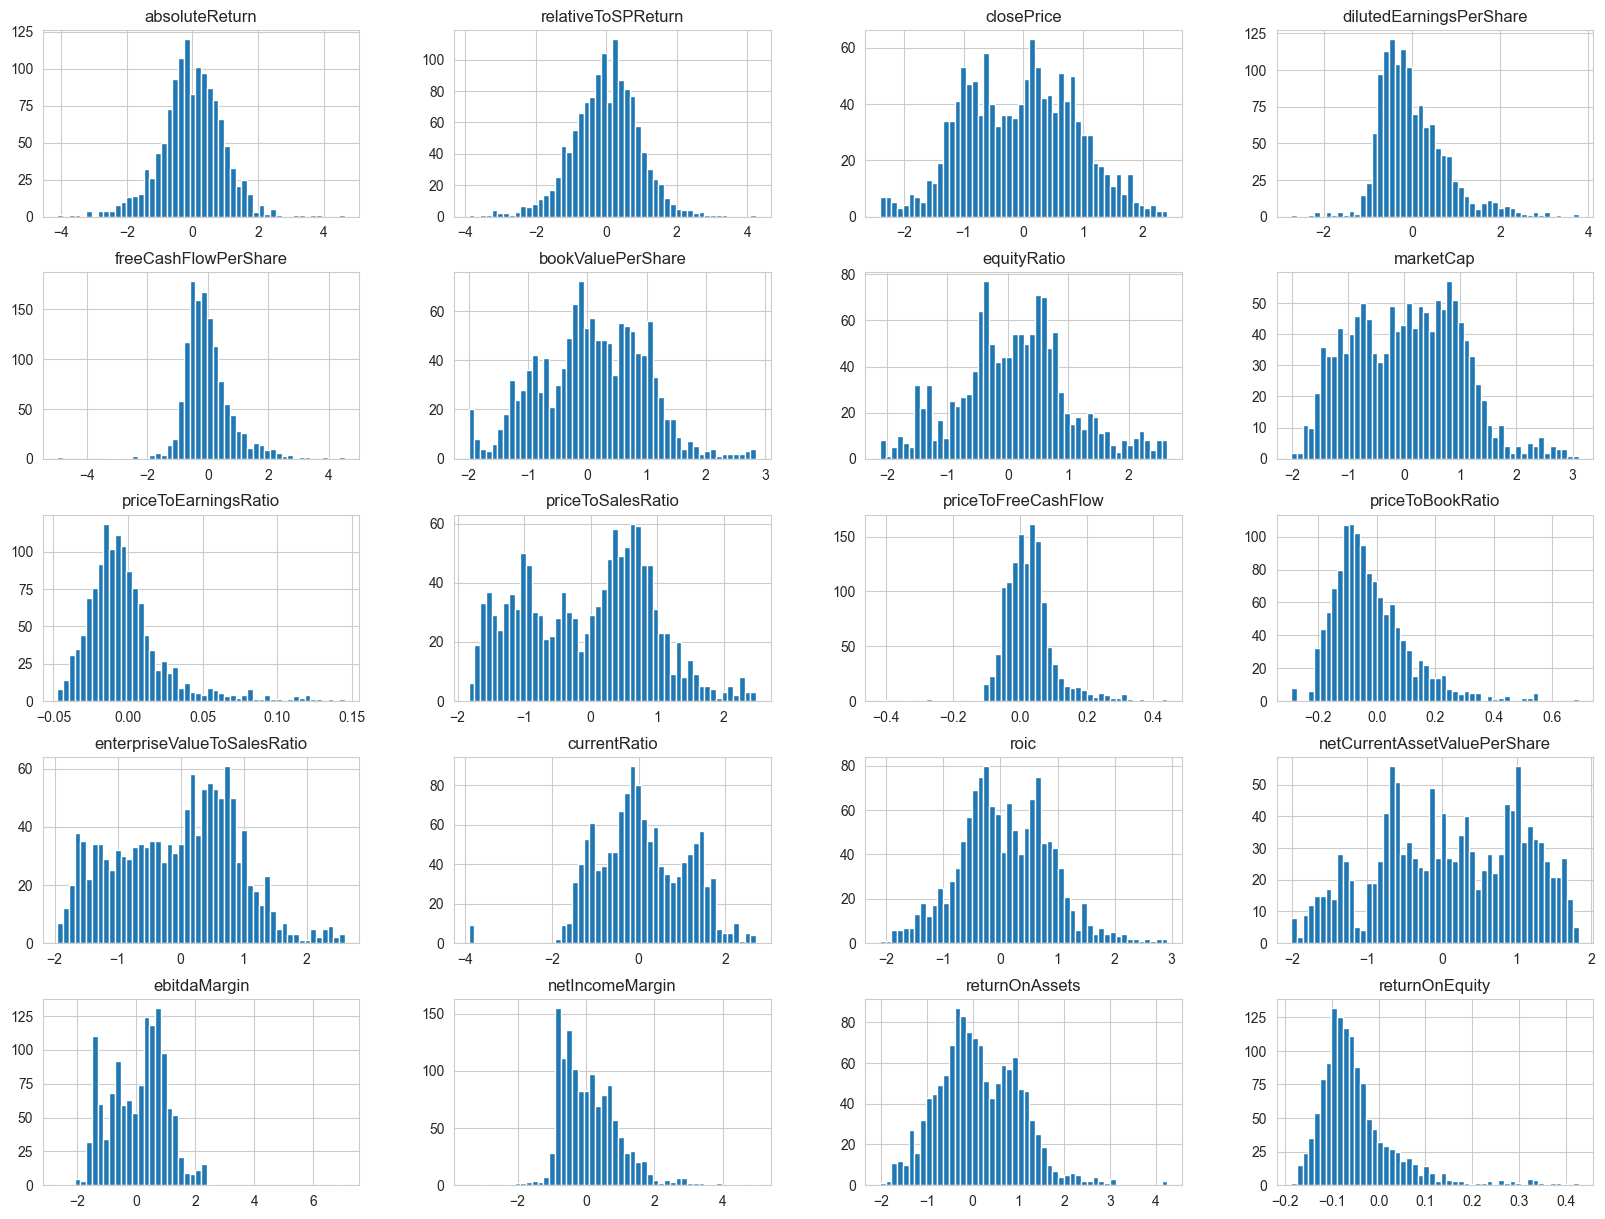

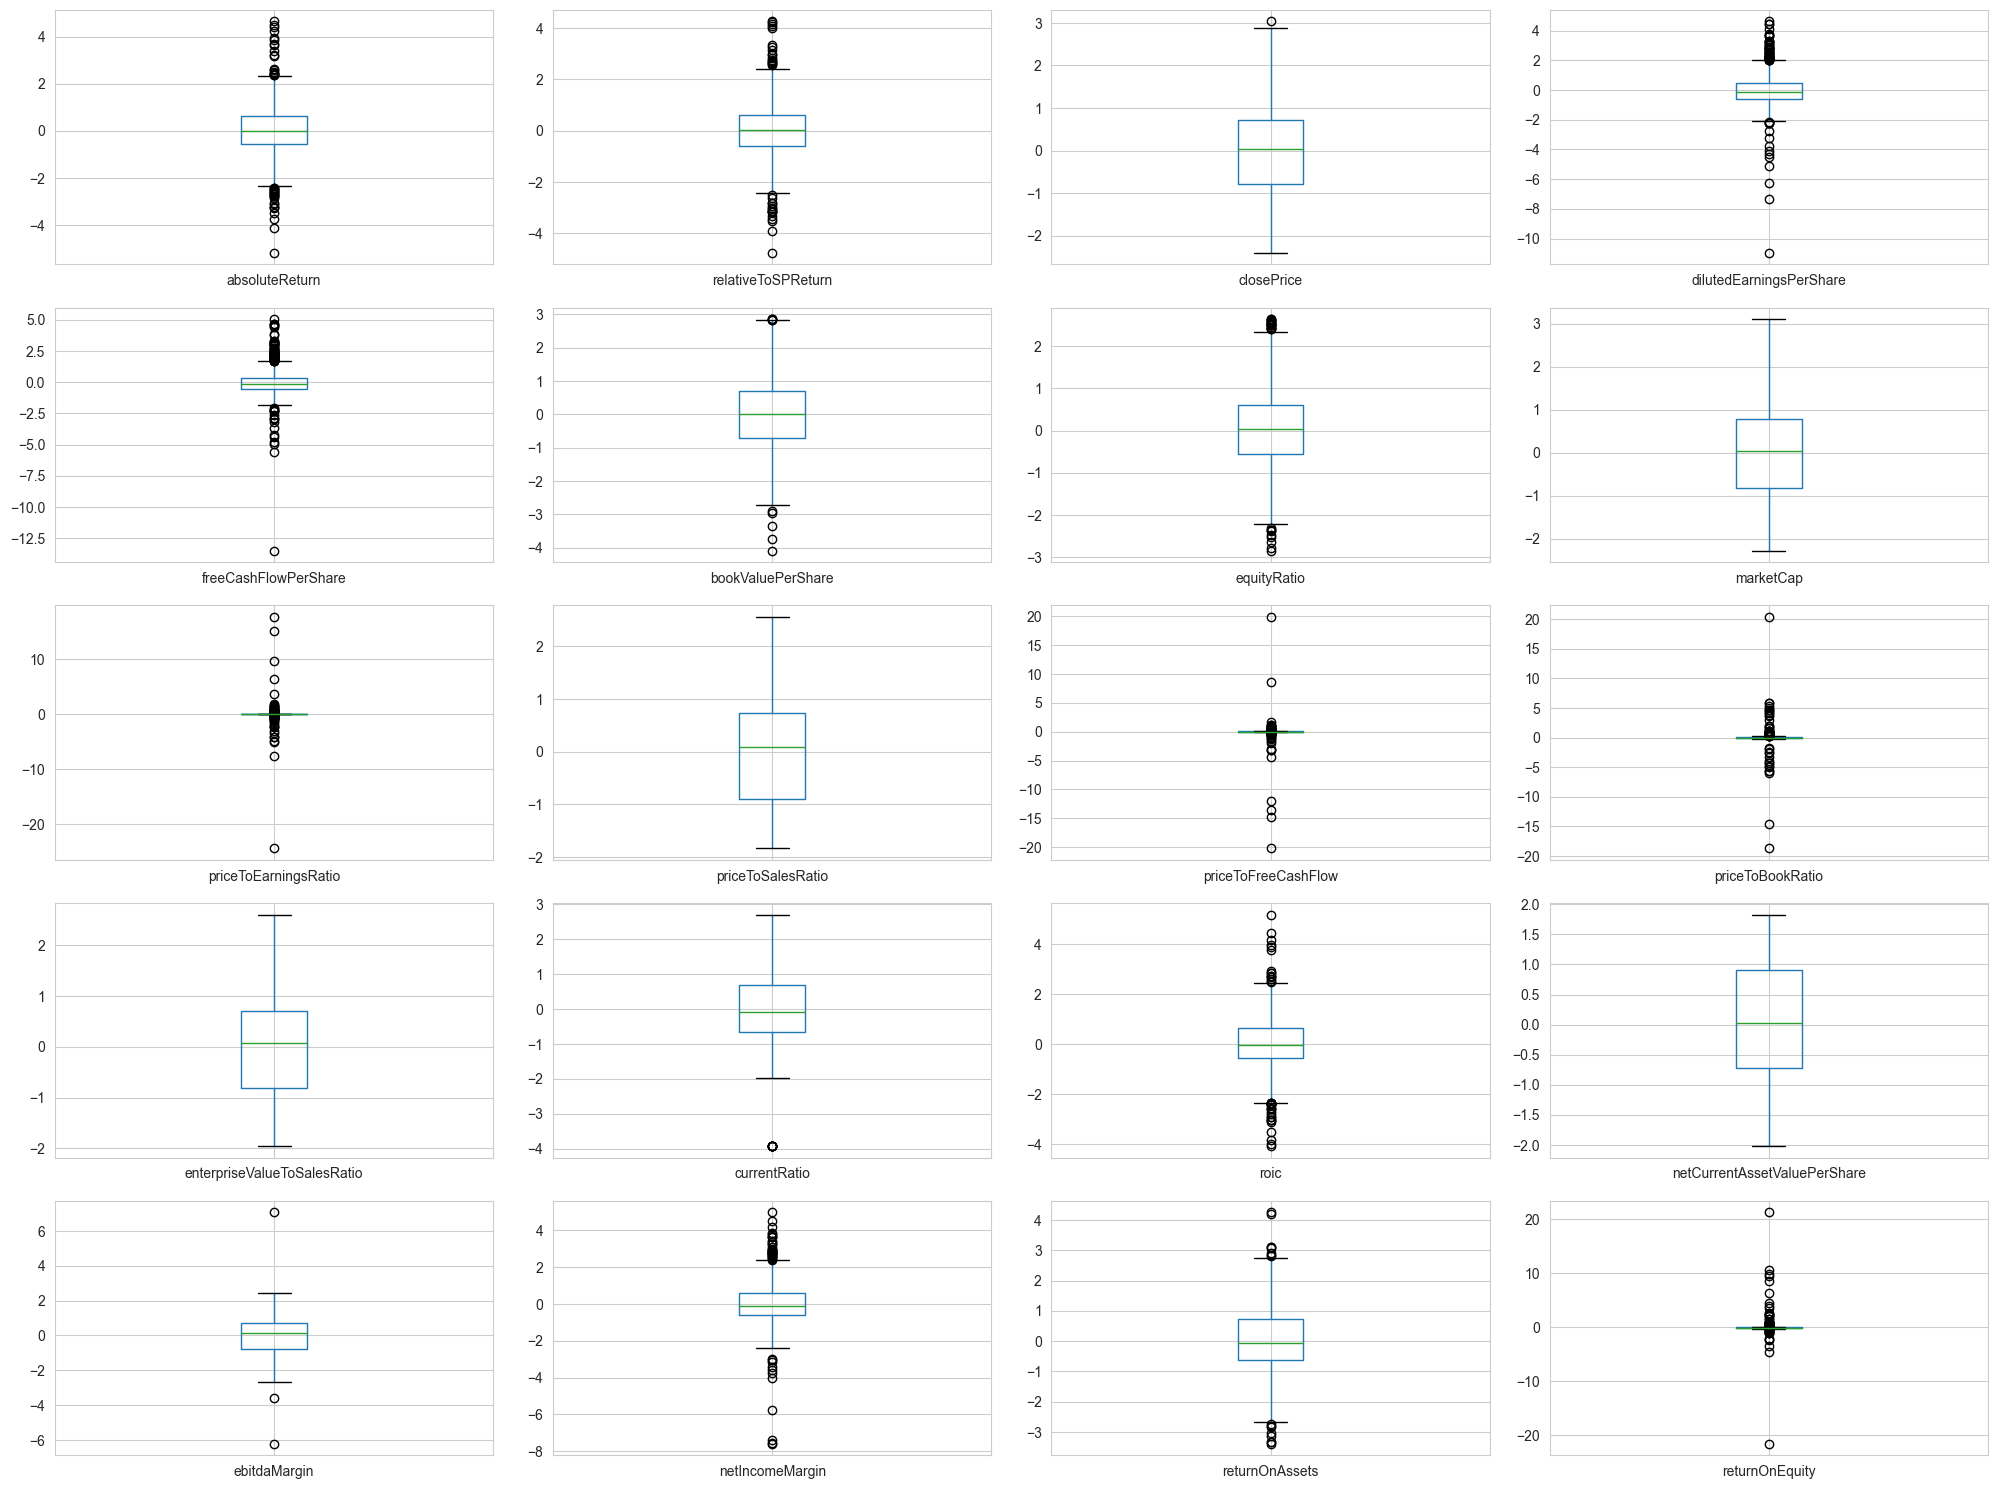

In [93]:

r_scaler = RobustScaler()
pscaler = PowerTransformer()

robust_power_scaler = make_pipeline(r_scaler, pscaler)
scaled_x = pd.DataFrame(robust_power_scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
visualise_data(scaled_x)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(RandomForestRegressor())
feat_names = selector.fit(X_train, y_train).get_feature_names_out()
feat_names

array(['absoluteReturn', 'relativeToSPReturn', 'closePrice',
       'freeCashFlowPerShare', 'marketCap', 'priceToFreeCashFlow'],
      dtype=object)

In [121]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator

from sklearn.svm import LinearSVR, LinearSVC
from sklearn.linear_model import LinearRegression

preprocessing = make_pipeline(robust_power_scaler)

linear_regr_pipeline = make_pipeline(preprocessing, LinearRegression())

svm_pipeline = make_pipeline(preprocessing, LinearSVR(epsilon=0.1, random_state=42))

random_forest_pipeline = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

pipelines = [('Linear regr', linear_regr_pipeline), ('SVM', svm_pipeline), ('Random forest', random_forest_pipeline)]

for name, pipeline in pipelines:
    print(name, '')
    rmses = -cross_val_score(pipeline, X_train[feat_names], y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
    est = pipeline.fit(X_train[feat_names], y_train)
    y_train_pred = est.predict(X_train[feat_names])
    y_test_pred = est.predict(X_test[feat_names])

    print(pd.Series(rmses).describe())
    print('train: ')
    print('MSE:', f'{mean_squared_error(y_train, y_train_pred, squared=False)}')
    print('MAE:', f'{mean_absolute_error(y_train, y_train_pred)}')
    print('R^2:', f'{r2_score(y_train, y_train_pred)}')
    print('test: ')
    print('MSE:', f'{mean_squared_error(y_test, y_test_pred, squared=False)}')
    print('MAE:', f'{mean_absolute_error(y_test, y_test_pred)}')
    print('R^2:', f'{r2_score(y_test, y_test_pred)}')


Linear regr 
count    10.000000
mean      0.099598
std       0.017290
min       0.078740
25%       0.085527
50%       0.096755
75%       0.111380
max       0.125938
dtype: float64
train: 
MSE: 0.09951075010120158
MAE: 0.07537262402760987
R^2: 0.04536447915483366
test: 
MSE: 0.11094398601528403
MAE: 0.08516949567089478
R^2: -0.07596284686805221
SVM 


D:\proj\fundPredictionML\venv\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\proj\fundPredictionML\venv\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\proj\fundPredictionML\venv\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\proj\fundPredictionML\venv\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\proj\fundPredictionML\venv\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\proj\fundPredictionML\venv\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to 

count    10.000000
mean      0.099511
std       0.017405
min       0.078276
25%       0.085074
50%       0.096742
75%       0.110782
max       0.126217
dtype: float64
train: 
MSE: 0.09976350507232057
MAE: 0.07545252974441735
R^2: 0.04050881668029349
test: 
MSE: 0.10950946879680408
MAE: 0.08382726440454076
R^2: -0.04831811260962904
Random forest 
count    10.000000
mean      0.101778
std       0.017011
min       0.077407
25%       0.090635
50%       0.097114
75%       0.113395
max       0.131703
dtype: float64
train: 
MSE: 0.037844733928240025
MAE: 0.028651247678835656
R^2: 0.8619270822204593
test: 
MSE: 0.11049716396968072
MAE: 0.0862739527811215
R^2: -0.06731351291774224
